In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("/database.csv")
df = df.drop(columns=["Unnamed: 0"])


In [4]:
X = df.filter(like="sensor")
y = df["parcel_0"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

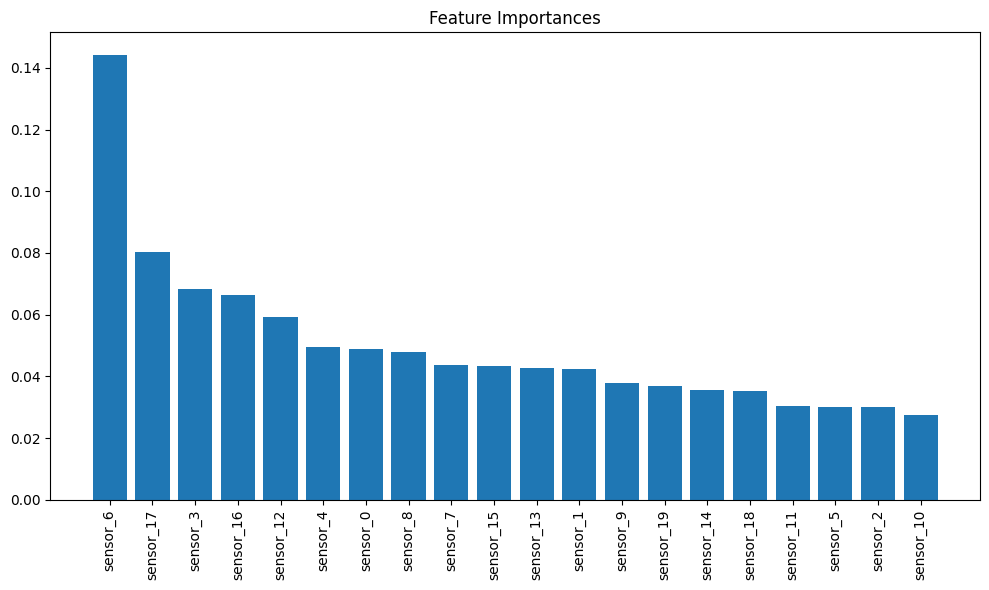

In [7]:
importances = model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [8]:
plt.savefig("feature_importance_plot.png")


<Figure size 640x480 with 0 Axes>

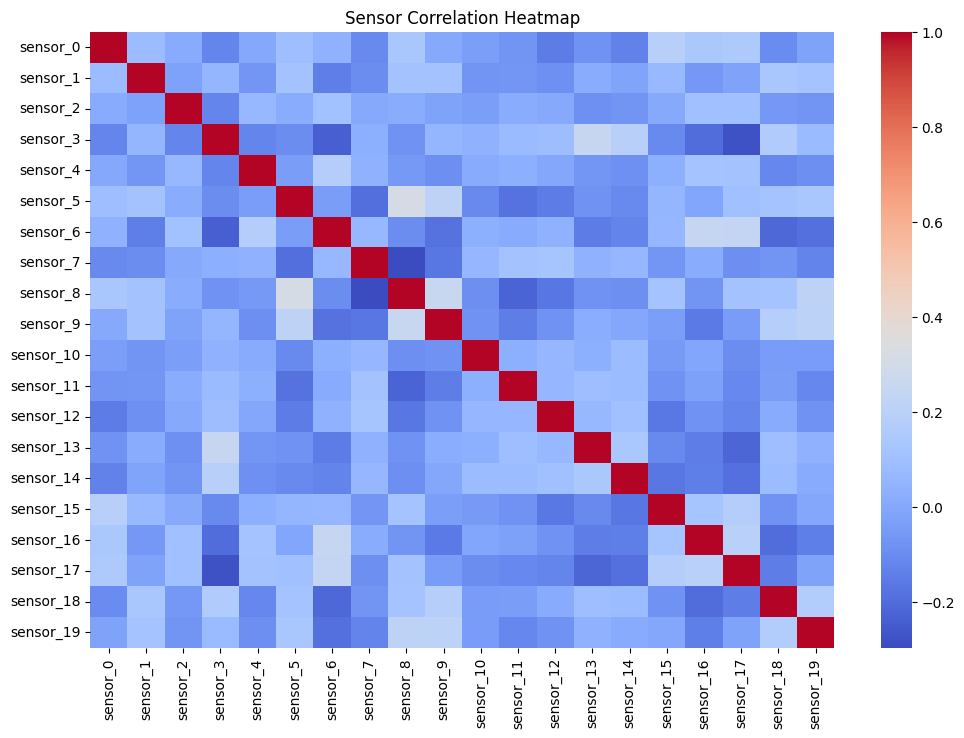

In [9]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title("Sensor Correlation Heatmap")
plt.show()


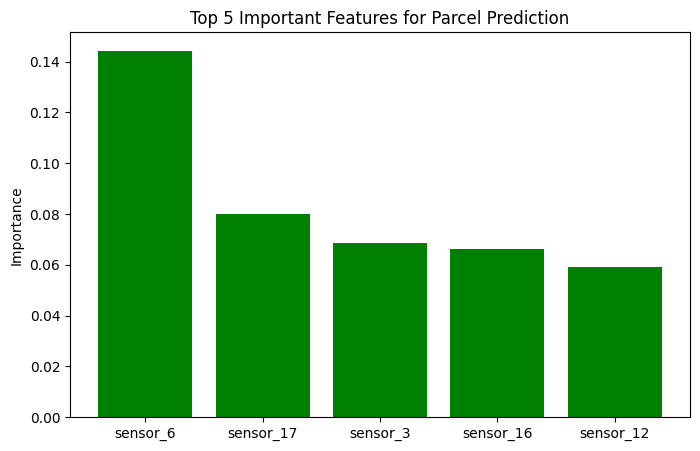

In [10]:
top_features = features[indices][:5]
top_importances = importances[indices][:5]

plt.figure(figsize=(8, 5))
plt.bar(top_features, top_importances, color='green')
plt.title("Top 5 Important Features for Parcel Prediction")
plt.ylabel("Importance")
plt.show()
